# Machine learning program (median house value)

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import time
print("Tensorflow version: "+tf.__version__)

Tensorflow version: 1.15.2


## Examples from datasets

In [3]:
# Google file system
from google.colab import drive
drive.mount('/GoogleDrive', force_remount=True)

ATT_FILE =   "/GoogleDrive/My Drive/Colab Notebooks/Datasets/OceanProximityPreparedCleanAttributes.csv"
LABEL_FILE = "/GoogleDrive/My Drive/Colab Notebooks/Datasets/OceanProximityOneHotEncodedClasses.csv"

attributes = pd.read_csv(ATT_FILE)
label =      pd.read_csv(LABEL_FILE)
print(label)
print(attributes)

Mounted at /GoogleDrive
       <1H OCEAN  INLAND  NEAR BAY  NEAR OCEAN
0            0.0     0.0       0.0         1.0
1            0.0     0.0       1.0         0.0
2            0.0     1.0       0.0         0.0
3            1.0     0.0       0.0         0.0
4            0.0     0.0       0.0         1.0
...          ...     ...       ...         ...
20423        1.0     0.0       0.0         0.0
20424        1.0     0.0       0.0         0.0
20425        0.0     1.0       0.0         0.0
20426        0.0     0.0       0.0         1.0
20427        1.0     0.0       0.0         0.0

[20428 rows x 4 columns]
       longitude  latitude  ...  median_income  median_house_value
0       0.013944 -0.630181  ...      -0.393415            0.415256
1      -0.555777  0.086079  ...      -0.741369           -0.494843
2       0.099602 -0.419766  ...      -0.706170           -0.726595
3       0.302789 -0.759830  ...       0.001228            0.352163
4      -0.599602  0.060574  ...      -0.060951     

In [4]:
TRAIN_RATIO = 0.8

n_instances = attributes.shape[0]
n_train = int(n_instances*TRAIN_RATIO)
n_dev = int((n_instances - n_train)/2)
n_test=n_dev

x_train = attributes.values[:n_train]
t_train = label.values[:n_train]
x_dev =   attributes.values[n_train:n_train + n_dev]
t_dev =   label.values[n_train:n_train + n_dev]
x_test=   attributes.values[n_train + n_dev:n_train + n_dev*2]
t_test=   label.values[n_train + n_dev:n_train + n_dev*2]

INPUTS =  x_train.shape[1]
OUTPUTS = t_train.shape[1]

NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES =      int(round(x_dev.shape[0]/1))
#NUM_TEST_EXAMPLES =      int(round(x_test.shape[0]/1))

OUTPUTS

4

## Model


In [0]:
n_neurons_per_hlayer = [2000,1000, 500, 250, 75, 25]
learning_rate = 0.1

In [6]:
model = keras.Sequential(name="my_model")
model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hlayer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))
opt = keras.optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2000)              20000     
_________________________________________________________________
batch_normalization (BatchNo (None, 2000)              8000      
_________________________________________________________________
dropout (Dropout)            (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1000)              4000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
___________________________________________

In [0]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=["categorical_accuracy"])


## Training

In [0]:
n_epochs = 5000
batch_size = 500
start_time = time.clock()

# Nouvelle section

In [9]:
history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 1, 
                    validation_data = (x_dev, t_dev))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
16342/16342 [==============================] - 0s 22us/sample - loss: 0.0662 - categorical_accuracy: 0.9755 - val_loss: 0.1438 - val_categorical_accuracy: 0.9559
Epoch 2502/5000
16342/16342 [==============================] - 0s 22us/sample - loss: 0.0568 - categorical_accuracy: 0.9780 - val_loss: 0.1231 - val_categorical_accuracy: 0.9623
Epoch 2503/5000
16342/16342 [==============================] - 0s 23us/sample - loss: 0.0620 - categorical_accuracy: 0.9763 - val_loss: 0.1232 - val_categorical_accuracy: 0.9613
Epoch 2504/5000
16342/16342 [==============================] - 0s 23us/sample - loss: 0.0659 - categorical_accuracy: 0.9741 - val_loss: 0.1335 - val_categorical_accuracy: 0.9584
Epoch 2505/5000
16342/16342 [==============================] - 0s 23us/sample - loss: 0.0619 - categorical_accuracy: 0.9748 - val_loss: 0.1481 - val_categorical_accuracy: 0.9525
Epoch 2506/5000
16342/16342 [===================

Testing:

In [10]:
import time 
start = time.time()
loss, acc = model.evaluate(x_test,t_test, verbose=1)
end = time.time()
print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

2043/2043 [==============================] - 0s 81us/sample - loss: 0.1629 - categorical_accuracy: 0.9618
CNN took 0.1728522777557373 seconds
Test loss: 0.1629182938308552 - Accuracy: 0.96182084


## Results

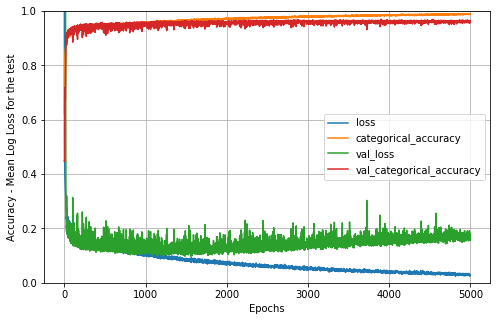

In [11]:
results = pd.DataFrame(history.history)
results.plot(figsize = (8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss for the test")
plt.gca().set_ylim(0, 1) # set the vertical range to [0,1]
plt.show()

In [12]:
print ("Error (training): ", 
       round((1 - results.categorical_accuracy.values[-1:][0])*100, 2), "%")
print ("Error (development test): ", 
       round((1 - results.val_categorical_accuracy.values[-1:][0])*100, 2), "%")
print ("Time: ", 
       round((time.clock() - start_time)),"seconds")

Error (training):  1.09 %
Error (development test):  3.72 %
Time:  3344 seconds
